GRIB data files:


http://ftp.ocean.weather.gov/grids/operational/NCOM/regional/READ_ME_regional.txt

NCOM files found here in
ftp/mpc.ncep.noaa.gov/grids/operational/NCOM/regional/ are in
NetCDF format and have a resolution of 1/30 degrees (~3.6 km)
The files include surface variables and variables for the entire
water column. The variables included are water temperature, currents,
salinity, surface atmospheric pressure, model surface temperature flux, model
surface salinity flux, model surface shortwave flux, model surface roughness,
surface wind stress and water surface elevation.
The new regional files are available daily by 21:30 UTC (5:30 p.m. EDT).
The new files include one tarred and zipped file for each of the 3 regions
that each contain 25 files: one file for each forecast hour from the 0 hour
nowcast through the 72 forecast at an interval of 3 hours. The Gulf of Mexico
and Alaska region files contain forecasts out to 96 hours at a 3 hour interval for a total
of 33 files in each region. They are split into A,B,C, D tar files for each forecast day.


ncom_relo_useast_u_YYYYMMDD00.tar.gz - US East Coast: 20-42N, 82-64W. After
	unzipping and untarring the 25 files are named
	ncom_relo_useast_u_YYYYMMDD00_t0ff.nc, where ff is the forecast hour.

http://www.opc.ncep.noaa.gov/Current_fcasts.shtml


[NOAA Data Dir](http://nomads.ncep.noaa.gov/pub/data/nccf/com/gens/prod/)

https://en.wikipedia.org/wiki/Marine_weather_forecasting


[NOAA Numerical Weather Prediction](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/numerical-weather-prediction)

[Global Ensemble Forecast System (GEFS)](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-ensemble-forecast-system-gefs)
GEFS is a global-coverage weather forecast model made up of 21 separate forecasts, or ensemble members, used to quantify the amount of uncertainty in a forecast. GEFS produces output four times a day with weather forecasts going out to 16 days.  [GEFS DATA](http://nomads.ncep.noaa.gov/pub/data/nccf/com/gens/prod/gefs.20180419/00/)

[Global Forecast System (GFS)](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs)
The GFS model is a coupled weather forecast model, composed of four separate models that work together to provide an accurate picture of weather conditions. GFS covers the entire globe down to a horizontal resolution of 28 km. [GFS Data](https://nomads.ncdc.noaa.gov/data/gfs4/201804/20180418/)


In [175]:
!ls GFS


#foo.txt#
20180429_055738_.grb.bz2
Atlantic.wave.7days.grb
Atlantic.wind.7days.grb
ECMWF_WRCTPaG_50k_6d_3h_44N_30S_-61E_-75W_20180428_0255.grb
ECMWF_Wave_50k_6d_3h_44N_30S_-61E_-75W_20180428_0255.grb
FNMOC-WW3-WAVES-20180429_060541_.grb
FNMOC-WW3-WAVES-20180429_060541_2.grb.bz2
GFS_WRCTPaG_50k_6d_3h_44N_30S_-61E_-75W_20180428_0130.grb
PWE_WRCTP_50k_6d_3h_44N_30S_-61E_-75W_20180428_0210.grb
PWE_Wave_50k_6d_3h_44N_30S_-61E_-75W_20180428_0300.grb
PWG_WRCTP_50k_6d_3h_44N_30S_-61E_-75W_20180427_2345.grb
PWG_Wave_50k_6d_3h_44N_30S_-61E_-75W_20180428_0040.grb
cmc_geavg.t00z.pgrb2af00
cmc_geavg.t00z.pgrb2af00.idx
cmc_geavg.t00z.pgrb2af06
cmc_geavg.t00z.pgrb2af06.idx
gfs.t00z.pgrb2.0p25.anl
gfs.t00z.pgrb2.0p25_20180428.f000
gfs_4_20180418_0000_000.grb
gfs_4_20180418_0000_000.inv
gfs_4_20180418_0000_003.grb
gfs_4_20180418_0000_003.inv
gfs_4_20180418_0000_006.grb
gfs_4_20180418_0000_006.inv
gfs_4_20180425_0000_000.grb
ncom_amseas_2018042200.grb
ncom_useast_2018042200.grb
ncom_useast_2018042700.gr

In [81]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
import os
%matplotlib inline
    
plt.figure(figsize=(15,10))
filename=''
while not os.path.isfile("GFS/"+filename):
    print "Invalid File: %s" % filename
    grbFiles = os.listdir("GFS/.")
    for grbi in range(len(grbFiles) - 1, -1, -1):
        if "grb" not in grbFiles[grbi] and "GRB" not in grbFiles[grbi]:
            del(grbFiles[grbi])
    for grbi in range(len(grbFiles)):
        print "File " + str(grbi), grbFiles[grbi]
    filename = raw_input("Choose " + str(range(len(grbFiles))) + " or Enter Valid Filename: ")
    if len(filename)<3:
        filename = grbFiles[int(filename)]
print "filename:",filename

#grib = 'cams_aod.grib' # Set the file name of your input GRIB file
#grib = 'GFS/gfs_4_20180418_0000_000.grb2'
#grib = 'GFS/gfs_4_20180418_0000_006.grb2'
#grib = 'GFS/ncom_useast_2018042700.grb2'
grbs = pygrib.open("GFS/"+filename)
plt.figure(figsize=(15,10))
 
grb = grbs.select()[0]
#data, lats, lons =  grb.data(lat1=32,lat2=42,lon1=360-71,lon2=360-31)
#print data, lats, lons
#exit
data = grb.values
 
# need to shift data grid longitudes from (0..360) to (-180..180)
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) ) 
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
#lons=lons-360
data, lons = shiftgrid(min(lons), data, lons, start=False)
print "plotting:",grb
print "GRIB range- LON:",lons[0],"to",lons[-1]
print "GRIB range- LAT:",lats[0],"to",lats[-1]

grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='cyl', llcrnrlon=lons.min(), \
    urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')

 
x, y = m(grid_lon, grid_lat)
 
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title('CAMS AOD forecast') # Set the name of the variable to plot
plt.savefig(filename+'.png') # Set the output file name
#del(data)
#del (grb)
#grbs.close()
#del (grbs)

Invalid File: 
File 0 PWE_WRCTP_50k_6d_3h_44N_30S_-61E_-75W_20180428_0210.grb
File 1 gfs_4_20180418_0000_000.grb
File 2 gfs.t00z.pgrb2.0p25_20180428.f000
File 3 gfs_4_20180418_0000_003.grb
File 4 zyGrib_Meteo_with_Wave_Data_20180429_171010_CL.grb.bz2
File 5 gfs_4_20180418_0000_006.grb
File 6 Atlantic.wind.7days.grb
File 7 ECMWF_WRCTPaG_50k_6d_3h_44N_30S_-61E_-75W_20180428_0255.grb
File 8 FNMOC-WW3-WAVES-20180429_060541_.grb
File 9 gfs_4_20180425_0000_000.grb
File 10 ECMWF_Wave_50k_6d_3h_44N_30S_-61E_-75W_20180428_0255.grb
File 11 zyGrib_Meteo_with_Wave_Data_20180429_171010_.grb
File 12 zyGrib_Meteo_with_Wave_20180430_021323_.grb.bz2
File 13 Atlantic.wave.7days.grb
File 14 zyGrib_Meteo_with_Wave_20180430_021323_copy.grb
File 15 FNMOC-WW3-WAVES-20180429_060541_2.grb.bz2
File 16 ncom_useast_2018042200.grb
File 17 ncom_useast_2018042700.grb.bz2
File 18 GFS_WRCTPaG_50k_6d_3h_44N_30S_-61E_-75W_20180428_0130.grb
File 19 cmc_geavg.t00z.pgrb2af00.idx
File 20 PWG_WRCTP_50k_6d_3h_44N_30S_-61E_-75

ValueError: llcrnrlon must be between -360.000000 and 720.000000 degrees

In [107]:
plotsToShow=[776,841,906]
arrowSpacing=5
#rangeOfPlot={"lat1":30,"lat2":44,"lon1":360-74,"lon2":360-30}
rangeOfPlot={}
grb = grbs.select()[plotsToShow[0]-1]
print "background: ",grb
data, lats, lons_in =  grb.data(**rangeOfPlot)
#sometimes data is shifted away from center of -180 to 180
LonsAdjust=sum([ii if -180 <= foo[0]+360*ii <= 180 else 0 for ii in np.linspace(-10,10,21) ])
#data,lats,lons = grb.data()
lons_min = np.linspace(lons_in[1,:][0],lons_in[1,:][-1],len(lons_in[1,:]))+360. * LonsAdjust
lats = np.linspace(lats[:,1][0],lats[:,1][-1],len(lats[:,1]))
data, lons = shiftgrid(min(lons_min), data, lons_min, start=False)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
plt.figure(figsize=(15,10))
m = Basemap(projection='merc', llcrnrlon=lons.min(), \
    urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')

 
x, y = m(grid_lon, grid_lat)
 
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title('CAMS AOD forecast') # Set the name of the variable to plot

grb = grbs.select()[plotsToShow[1]-1]
print "U:",grb, "\n   vs"
U, dum1, dum2 =  grb.data(lat1=31,lat2=43,lon1=360-72,lon2=360-30)
#dataU, lons = shiftgrid(min(lons), data, lons_in, start=False)
grb = grbs.select()[plotsToShow[2]-1]
print "V:",grb
V, dum1, dum2 =  grb.data(lat1=31,lat2=43,lon1=360-72,lon2=360-30)


Q = plt.quiver(x[::arrowSpacing,::arrowSpacing], y[::arrowSpacing,::arrowSpacing], \
               U[::arrowSpacing,::arrowSpacing], V[::arrowSpacing,::arrowSpacing], units='width')

background:  776:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2:fcst time 0 hrs:from 201804281800


ValueError: llcrnrlon must be between -360.000000 and 720.000000 degrees

In [156]:
foo=np.linspace(-439,-420,5)
print foo
print (foo+1e6) % 360 -360
print foo+360
data, lats, lons_in =  grb.data()
#print zip(lats[:,0],lats[:,0] % 360)
print "Lons Min Max",lons_in.min(),lons_in.max()
print "Lats Min Max",lats.min(),lats.max()
#print grb.latlons()
latCnt=len(lats[:,0])
fakeLats=lats[:,0][0]+np.arange(latCnt)*(lons_in[0,:][0]-lons_in[0,:][1])
print len(fakeLats),fakeLats
print len(lons_in[0,:]),lons_in[0,:]
print grb
#lats[:,0]

[-439.   -434.25 -429.5  -424.75 -420.  ]
[-159.   -154.25 -149.5  -144.75 -140.  ]
[-79.   -74.25 -69.5  -64.75 -60.  ]
Lons Min Max -79.0 -60.0
Lats Min Max -2199.224 46.0
69 [ 46.    45.75  45.5   45.25  45.    44.75  44.5   44.25  44.    43.75
  43.5   43.25  43.    42.75  42.5   42.25  42.    41.75  41.5   41.25  41.
  40.75  40.5   40.25  40.    39.75  39.5   39.25  39.    38.75  38.5
  38.25  38.    37.75  37.5   37.25  37.    36.75  36.5   36.25  36.    35.75
  35.5   35.25  35.    34.75  34.5   34.25  34.    33.75  33.5   33.25  33.
  32.75  32.5   32.25  32.    31.75  31.5   31.25  31.    30.75  30.5
  30.25  30.    29.75  29.5   29.25  29.  ]
77 [-79.   -78.75 -78.5  -78.25 -78.   -77.75 -77.5  -77.25 -77.   -76.75
 -76.5  -76.25 -76.   -75.75 -75.5  -75.25 -75.   -74.75 -74.5  -74.25 -74.
 -73.75 -73.5  -73.25 -73.   -72.75 -72.5  -72.25 -72.   -71.75 -71.5
 -71.25 -71.   -70.75 -70.5  -70.25 -70.   -69.75 -69.5  -69.25 -69.   -68.75
 -68.5  -68.25 -68.   -67.75 -67.5  -67.

In [8]:
ggrb=grbs.select()[841-1]
rangeOfPlot={"lat1":30,"lat2":44,"lon1":360-74,"lon2":360-32}
rangeOfPlot={}
print "background: ",ggrb
data, lats, lons_in =  ggrb.data(**rangeOfPlot)
print ggrb.values.shape
for ii in ggrb.keys():
    print ii,":",
    try:
        print ggrb[ii]
    except:
        print "BAD DATA"

background:  841:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 0 hrs:from 201804290600
(77, 85)
parametersVersion : 1
UseEcmfConventions : 1
GRIBEX_boustrophedonic : 0
hundred : [100 100]
globalDomain : g
GRIBEditionNumber : 1
eps : 0
offsetSection0 : 0
section0Length : 8
totalLength : 10719
editionNumber : 1
WMO : 0
productionStatusOfProcessedData : 0
section1Length : 28
wrongPadding : 0
table2Version : 2
centre : kwbc
centreDescription : US National Weather Service - NCEP
generatingProcessIdentifier : 81
gridDefinition : 255
indicatorOfParameter : 33
parameterName : U U-component of wind m s**-1
parameterUnits : unknown
indicatorOfTypeOfLevel : sfc
pressureUnits : hPa
typeOfLevelECMF : heightAboveGround
typeOfLevel : heightAboveGround
level : 10
yearOfCentury : 18
month : 4
day : 29
hour : 6
minute : 0
second : 0
unitOfTimeRange : 1
P1 : 0
P2 : 0
timeRangeIndicator : 10
numberIncludedInAverage : 0
numberMissingFromAveragesOrAccumulations 

In [9]:
ggrb['values']

array([[-0.19281738, -0.08281738,  0.17718262, ...,  0.52718262,
         0.71718262,  0.62718262],
       [-0.29281738, -0.38281738, -0.20281738, ...,  0.58718262,
         0.89718262,  1.00718262],
       [-0.28281738, -0.55281738, -0.52281738, ...,  0.94718262,
         1.41718262,  1.71718262],
       ..., 
       [-1.27281738, -1.92281738, -1.43281738, ..., -3.97281738,
        -4.21281738, -4.36281738],
       [-1.60281738, -2.01281738, -1.47281738, ..., -4.26281738,
        -4.29281738, -4.39281738],
       [-1.79281738, -1.93281738, -1.35281738, ..., -4.51281738,
        -4.60281738, -4.65281738]])

In [174]:
myLats=np.array(grb['distinctLatitudes'])
print myLats[0:6]
print myLats[0:6]+np.arange(6)*grb['jDirectionIncrementInDegrees']

[  46.      12.982  -20.036  -53.054  -86.072 -119.09 ]
[ 46.  46.  46.  46.  46.  46.]


In [7]:
for i in range(grbs.messages):
    print grbs.message(i+1)

1:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 0-3 hrs (avg):from 201804290600
2:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 0-6 hrs (avg):from 201804290600
3:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 6-9 hrs (avg):from 201804290600
4:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 6-12 hrs (avg):from 201804290600
5:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 12-15 hrs (avg):from 201804290600
6:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 12-18 hrs (avg):from 201804290600
7:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 18-21 hrs (avg):from 201804290600
8:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 18-24 hrs (avg):from 201804290600
9:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 24-27 hrs (avg):from 201804290600
10:Total Cloud Cover:% (avg):regular_ll:unknown:level 0:fcst time 24-30 hrs (avg):from 201804290600
11:Total Cloud C

143:180:180 (instant):regular_ll:surface:level 0:fcst time 39 hrs:from 201804290600
144:180:180 (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 201804290600
145:180:180 (instant):regular_ll:surface:level 0:fcst time 45 hrs:from 201804290600
146:180:180 (instant):regular_ll:surface:level 0:fcst time 48 hrs:from 201804290600
147:180:180 (instant):regular_ll:surface:level 0:fcst time 51 hrs:from 201804290600
148:180:180 (instant):regular_ll:surface:level 0:fcst time 54 hrs:from 201804290600
149:180:180 (instant):regular_ll:surface:level 0:fcst time 57 hrs:from 201804290600
150:180:180 (instant):regular_ll:surface:level 0:fcst time 60 hrs:from 201804290600
151:180:180 (instant):regular_ll:surface:level 0:fcst time 63 hrs:from 201804290600
152:180:180 (instant):regular_ll:surface:level 0:fcst time 66 hrs:from 201804290600
153:180:180 (instant):regular_ll:surface:level 0:fcst time 69 hrs:from 201804290600
154:180:180 (instant):regular_ll:surface:level 0:fcst time 72 hrs:from 20180

258:Relative humidity:% (instant):regular_ll:heightAboveGround:level 2:fcst time 189 hrs:from 201804290600
259:Relative humidity:% (instant):regular_ll:heightAboveGround:level 2:fcst time 192 hrs:from 201804290600
260:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 0 hrs:from 201804290600
261:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 3 hrs:from 201804290600
262:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 6 hrs:from 201804290600
263:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 9 hrs:from 201804290600
264:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 12 hrs:from 201804290600
265:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 15 hrs:from 201804290600
266:Geopotential Height:gpm (instant):regular_ll:isothermZero:level 0:fcst time 18 hrs:from 201804290600
267:Geopotential Height:gpm (instant):regular_ll:isothe

452:Maximum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 186-189 hrs (accum):from 201804290600
453:Maximum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 186-192 hrs (accum):from 201804290600
454:Minimum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 0-3 hrs (accum):from 201804290600
455:Minimum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 0-6 hrs (accum):from 201804290600
456:Minimum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 6-9 hrs (accum):from 201804290600
457:Minimum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst time 6-12 hrs (accum):from 201804290600
458:Minimum temperature at 2 metres in the last 6 hours:K (accum):regular_ll:heightAboveGround:level 2:fcst t

In [184]:
for ii in [838,841,843]:
    bla=grbs.select()[ii-1]
    print bla
    print bla[u'shortName']

838:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2:fcst time 186 hrs:from 201804290600
2t
841:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 0 hrs:from 201804290600
10u
843:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 6 hrs:from 201804290600
10u


In [204]:
import 
selected_grbs=grbs(shortName=['10u','10v'])
bla={}
corners=[(0,0),(0,-1),(-1,0),(-1,-1)]
for ggrb in selected_grbs: 
    key="%d%04d"%(ggrb[u'validityDate'],ggrb[u'validityTime'])
    if key in bla:
        bla[key].extend([[ggrb.values[ii,jj] for ii,jj in corners]])
        bla[key].extend([[1.94384*np.hypot(ii,jj) for ii,jj in zip(bla[key][0],bla[key][1])]])
    else:
        bla[key]=[[ggrb.values[ii,jj] for ii,jj in corners]]
    print ggrb[u'shortName'],"%d%04d"%(ggrb[u'validityDate'],ggrb[u'validityTime']), bla[key]
    #bla["%d%4d"%(ggrb[u'validityDate'],ggrb[u'validityTime'])][]


10u 201804290600 [[-0.19281738281249999, 0.62718261718750001, -1.7928173828125, -4.6528173828124997]]
10u 201804290900 [[0.15514160156250001, 1.6651416015625, 2.0651416015624999, -4.2048583984374996]]
10u 201804291200 [[0.22320556640625, -2.9667944335937499, 3.0332055664062501, -4.6167944335937499]]
10u 201804291500 [[0.50194580078125006, -2.2580541992187499, 2.5619458007812499, -4.6980541992187499]]
10u 201804291800 [[0.90273193359375004, -2.1872680664062503, 0.20273193359375, -3.8772680664062502]]
10u 201804292100 [[1.26784423828125, 2.70784423828125, -1.72215576171875, -2.9721557617187502]]
10u 201804300000 [[-1.0540625000000001, 9.2359375000000004, -4.5440624999999999, -3.3440625000000002]]
10u 201804300300 [[0.34432617187500003, 9.6243261718749995, -4.9456738281249999, -3.4856738281249999]]
10u 201804300600 [[1.2487353515624999, 7.0487353515624998, -4.8212646484375004, -4.1012646484374997]]
10u 201804300900 [[1.089111328125, 3.0791113281250002, -4.9608886718749998, -4.080888671874

In [82]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import interpolate
import numpy as np
from numpy import ma
import sys
import math
import time
#%matplotlib inline

def make_wind_map_from_grb(Agrbs,Resolution=0.0625):
    """returns an table of wind vectors in knots vs time"""
#    TopLeft=(41.4646,-71.3749),BottomRight=(32.3191,-64.7526)
    dataMap={}
    sub_grbsU=Agrbs(shortName=['10u'])
    Ni,Nj=(-999,-999)
    firstKey=-999
    for ggrb in sub_grbsU: 
        key="%d%04d"%(ggrb[u'validityDate'],ggrb[u'validityTime'])
        tt=time.strptime(key, '%Y%m%d%H%M')
        superHour=8766*tt.tm_year+tt.tm_yday*24+tt.tm_hour
        firstKey = superHour if firstKey<0 else firstKey
        dataMap[superHour]={'key':key,'latFPDeg' : ggrb['latitudeOfFirstGridPointInDegrees'],\
                            'lonFPDeg' : ggrb['longitudeOfFirstGridPointInDegrees'],\
                            'latLPDeg' : ggrb['latitudeOfLastGridPointInDegrees'],\
                            'lonLPDeg' : ggrb['longitudeOfLastGridPointInDegrees'],\
                            'Validity' : (ggrb[u'validityDate'],ggrb[u'validityTime']),\
                            'Ni':ggrb['Ni'],'Nj':ggrb['Nj']}
        Ni=Ni if Ni>=ggrb['Ni'] else ggrb['Ni']
        Nj=Nj if Nj>=ggrb['Nj'] else ggrb['Nj']
    
    
    targetLats=np.linspace(dataMap[firstKey]['latFPDeg'],dataMap[firstKey]['latLPDeg'],\
                           abs(int(1+(dataMap[firstKey]['latLPDeg']-dataMap[firstKey]['latFPDeg'])/Resolution)))
    targetLons=np.linspace(dataMap[firstKey]['lonFPDeg'],dataMap[firstKey]['lonLPDeg'],\
                           abs(int(1+(dataMap[firstKey]['lonLPDeg']-dataMap[firstKey]['lonFPDeg'])/Resolution)))
    
    Lons,Lats,T = np.meshgrid(targetLons,targetLats,sorted(dataMap.keys()))
    U = 0.*Lons*T
    V = 0.*Lats*T
    print "U,V built! U:",U.shape," V:",V.shape
    timeEntryCntr=0
#    print dataMap
    skipped=0.
    for thisEntry in sorted(dataMap.keys()):
        thisLats=[]
        thisLons=[]
        for thisGrb in Agrbs(shortName=['10u','10v'],validityTime=dataMap[thisEntry]['Validity'][1],\
                             validityDate=dataMap[thisEntry]['Validity'][0]):
            if len(thisLats)==0:
                thisLats=np.linspace(thisGrb['latitudeOfFirstGridPointInDegrees'],\
                                     thisGrb['latitudeOfLastGridPointInDegrees'],thisGrb['Nj'])
                thisLons=np.linspace(thisGrb['longitudeOfFirstGridPointInDegrees'],\
                                     thisGrb['longitudeOfLastGridPointInDegrees'],thisGrb['Ni'])
                print "Interpolating:",thisGrb['values'].shape,"==>",U[...,0].shape
            print "Handling:",thisGrb
            if timeEntryCntr==0:
                print "thisLats (=y):",len(thisLats),thisLats
                print "thisLons (=x):",len(thisLons),thisLons
                print "Shape of values",thisGrb['values'].shape
                #print thisLons[:-1]-thisLons[1:]
            f = interpolate.interp2d(thisLons, np.flip(thisLats,0), \
                                                np.flip(thisGrb['values'],0))
            if thisGrb['shortName']=='10u':
                U[...,timeEntryCntr]=np.flip(f(targetLons,targetLats),0) * 1.94384    #m/s to knots
            else:
                V[...,timeEntryCntr]=np.flip(f(targetLons,targetLats),0) * 1.94384    #m/s to knots
                thisLats=[]
                thisLons=[]
                
        timeEntryCntr +=1
        
    return {'Lons':Lons[...,0],'Lats':Lats[...,0],'U':U,'V':V,'T':dataMap}

res=make_wind_map_from_grb(grbs)





U,V built! U: (303, 337, 65)  V: (303, 337, 65)
Interpolating: (77, 85) ==> (303, 337)
Handling: 841:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 0 hrs:from 201804291800
thisLats (=y): 77 [ 47.    46.75  46.5   46.25  46.    45.75  45.5   45.25  45.    44.75
  44.5   44.25  44.    43.75  43.5   43.25  43.    42.75  42.5   42.25  42.
  41.75  41.5   41.25  41.    40.75  40.5   40.25  40.    39.75  39.5
  39.25  39.    38.75  38.5   38.25  38.    37.75  37.5   37.25  37.    36.75
  36.5   36.25  36.    35.75  35.5   35.25  35.    34.75  34.5   34.25  34.
  33.75  33.5   33.25  33.    32.75  32.5   32.25  32.    31.75  31.5
  31.25  31.    30.75  30.5   30.25  30.    29.75  29.5   29.25  29.    28.75
  28.5   28.25  28.  ]
thisLons (=x): 85 [-80.   -79.75 -79.5  -79.25 -79.   -78.75 -78.5  -78.25 -78.   -77.75
 -77.5  -77.25 -77.   -76.75 -76.5  -76.25 -76.   -75.75 -75.5  -75.25 -75.
 -74.75 -74.5  -74.25 -74.   -73.75 -73.5  -73.25 -73.   -

Interpolating: (77, 85) ==> (303, 337)
Handling: 861:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 60 hrs:from 201804291800
Handling: 926:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 60 hrs:from 201804291800
Interpolating: (77, 85) ==> (303, 337)
Handling: 862:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 63 hrs:from 201804291800
Handling: 927:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 63 hrs:from 201804291800
Interpolating: (77, 85) ==> (303, 337)
Handling: 863:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 66 hrs:from 201804291800
Handling: 928:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 66 hrs:from 201804291800
Interpolating: (77, 85) ==> (303, 337)
Handling: 864:10 metre U wind component:m s**-1 (instant):

Interpolating: (39, 43) ==> (303, 337)
Handling: 889:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 144 hrs:from 201804291800
Handling: 954:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 144 hrs:from 201804291800
Interpolating: (39, 43) ==> (303, 337)
Handling: 890:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 147 hrs:from 201804291800
Handling: 955:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 147 hrs:from 201804291800
Interpolating: (39, 43) ==> (303, 337)
Handling: 891:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 150 hrs:from 201804291800
Handling: 956:10 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 150 hrs:from 201804291800
Interpolating: (39, 43) ==> (303, 337)
Handling: 892:10 metre U wind component:m s**-1 (ins

dataRange: [(28.0, 47.0), (-80.0, -59.0)]


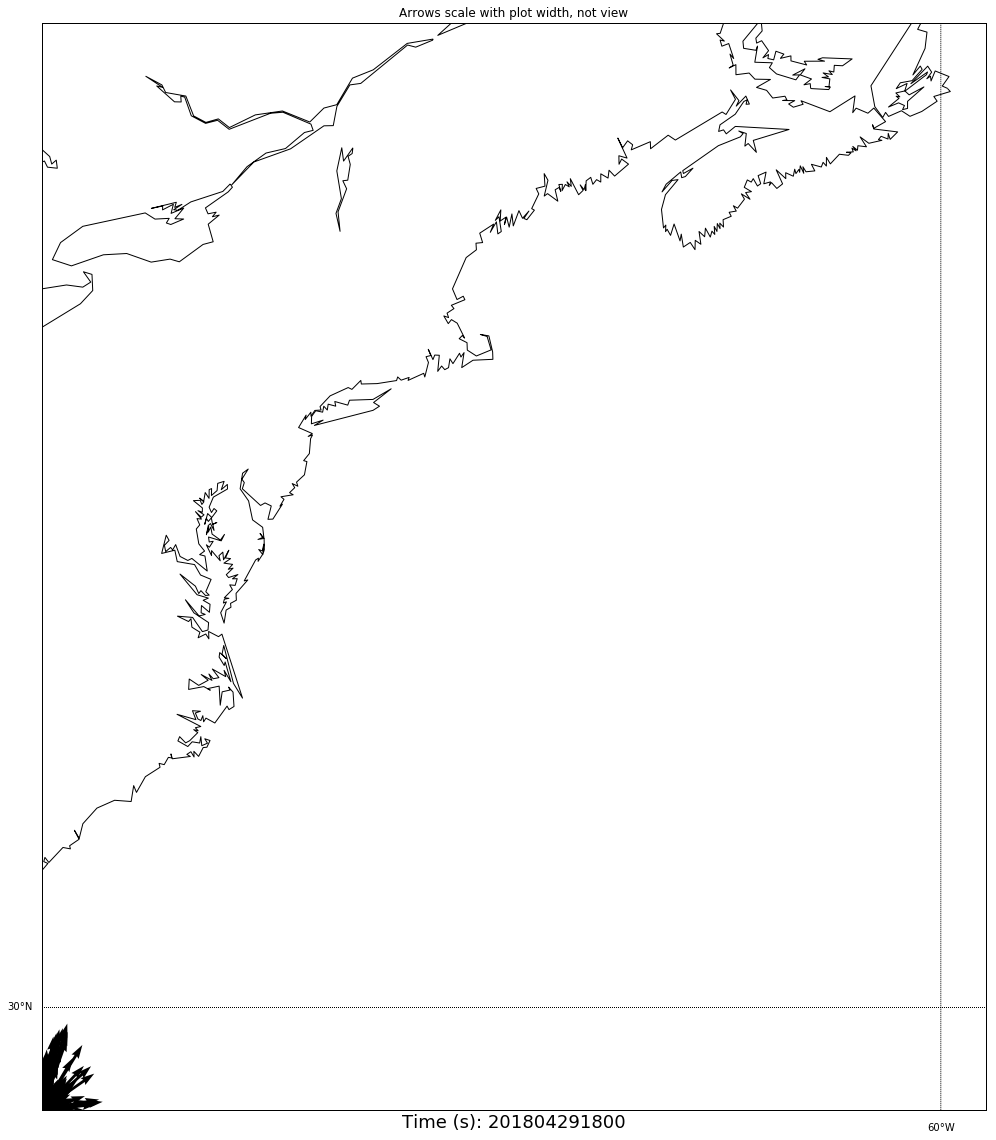

In [101]:
#
#  https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/
#

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from numpy import ma
import sys
import math

arrowSpacing=16
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(20, 20))

#ax1=plt.subplot(211)
plt.title('Arrows scale with plot width, not view')
step=0
#cmap = plt.cm.jet
allTimes=sorted(res['T'].keys())
dataRange=[(min(i),max(i)) for i in [res['Lats'][:,0],res['Lons'][0,:]]]
print "dataRange:",dataRange
m = Basemap(projection='merc',llcrnrlon=dataRange[1][0],urcrnrlon=dataRange[1][1],\
            llcrnrlat=dataRange[0][0],urcrnrlat=dataRange[0][1],resolution='l')

#x, y = m(grid_lon, grid_lat)
windy=np.hypot(res['U'][...,0],res['V'][...,0])
cs = m.pcolormesh(res['Lons'],res['Lats'],windy,shading='flat',cmap=plt.cm.jet)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
qax = ax.quiver(res['Lons'][::arrowSpacing,::arrowSpacing], res['Lats'][::arrowSpacing,::arrowSpacing], \
               res['U'][::arrowSpacing,::arrowSpacing,step], res['V'][::arrowSpacing,::arrowSpacing,step] \
               ,units='width',scale=400)
ax.set_xlabel('Time (s): ' + str(res['T'][allTimes[0]]['key']),fontsize=18)

def animate(i):
    qax.set_UVC(res['U'][::arrowSpacing,::arrowSpacing,i], res['V'][::arrowSpacing,::arrowSpacing,i])
    #qax.set_color(cmap(30+i*20))
    ax.set_xlabel('Time (s): ' + str(res['T'][allTimes[i]]['key']),fontsize=18)
    
anim = FuncAnimation(
    fig, animate, interval=250, frames=len(res['U'][1,1,:])-1)
 
plt.draw()
plt.show()

anim.save('realWinds.mp4')

In [94]:
windy

array([[  7.02482698,   7.14887752,   7.27323125, ...,   4.07098611,
          6.36342211,   8.75688524],
       [  7.04780736,   7.17343265,   7.29920076, ...,   6.28739456,
          8.59070012,  10.92556012],
       [  7.07081119,   7.19809705,   7.3254253 , ...,   8.54736286,
         10.81924841,  13.09831215],
       ..., 
       [  3.46863611,   3.84894645,   4.29293482, ...,  14.45932017,
         14.5538811 ,  14.6486724 ],
       [  3.35760179,   3.75096197,   4.2224227 , ...,  14.51308417,
         14.60584915,  14.69880349],
       [  3.27000135,   3.66834605,   4.16262392, ...,  14.56888372,
         14.65973718,  14.75074348]])

In [87]:
[(min(i),max(i)) for i in [res['Lats'][:,0],res['Lons'][0,:]]]

[(28.0, 47.0), (-80.0, -59.0)]

In [43]:
len(res['U'][1,1,:])

65

In [25]:
grb=grbs.select()[841-1]
print grb
grb['values'].transpose()

841:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10:fcst time 0 hrs:from 201804290600


array([[-0.19281738, -0.29281738, -0.28281738, ..., -1.27281738,
        -1.60281738, -1.79281738],
       [-0.08281738, -0.38281738, -0.55281738, ..., -1.92281738,
        -2.01281738, -1.93281738],
       [ 0.17718262, -0.20281738, -0.52281738, ..., -1.43281738,
        -1.47281738, -1.35281738],
       ..., 
       [ 0.52718262,  0.58718262,  0.94718262, ..., -3.97281738,
        -4.26281738, -4.51281738],
       [ 0.71718262,  0.89718262,  1.41718262, ..., -4.21281738,
        -4.29281738, -4.60281738],
       [ 0.62718262,  1.00718262,  1.71718262, ..., -4.36281738,
        -4.39281738, -4.65281738]])

In [37]:
import time
key="%d%04d"%(ggrb[u'validityDate'],ggrb[u'validityTime'])
tt=time.strptime(key, '%Y%m%d%H%M')
print key,8766*tt.tm_year+tt.tm_yday*24+tt.tm_hour
print 

201804290600 17692650



In [39]:
a=-999
for b in range(5):
    print a,b
    a=b if a<0 else a


-999 0
0 1
0 2
0 3
0 4


In [30]:
a=range(5)
print a
a.append([1,2])
print a

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, [1, 2]]


In [44]:
import pygrib

filename="GFS/gfs_4_20180425_0000_000.grb2"
grbs=pygrib.open(filename)
for i in range(grbs.messages):
    #grb=grbs.select(i+1)
    print grbs.message(i+1)
grbs.close()

1:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201804250000
2:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201804250000
3:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201804250000
4:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201804250000
5:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201804250000
6:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201804250000
7:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201804250000
8:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201804250000
9:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201804250000
10:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa

91:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
92:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
93:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
94:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
95:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
96:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
97:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201804250000
98:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 201804250000
99:Temperature:K (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 201804

210:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 90000 Pa:fcst time 0 hrs:from 201804250000
211:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 90000 Pa:fcst time 0 hrs:from 201804250000
212:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 90000 Pa:fcst time 0 hrs:from 201804250000
213:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 90000 Pa:fcst time 0 hrs:from 201804250000
214:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 201804250000
215:Temperature:K (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 201804250000
216:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 201804250000
217:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:from 201804250000
218:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 0 hrs:fro

326:Relative humidity:% (instant):regular_ll:sigmaLayer:levels 0.44-1.0 sigma value:fcst time 0 hrs:from 201804250000
327:Relative humidity:% (instant):regular_ll:sigmaLayer:levels 0.72-0.94 sigma value:fcst time 0 hrs:from 201804250000
328:Relative humidity:% (instant):regular_ll:sigmaLayer:levels 0.44-0.72 sigma value:fcst time 0 hrs:from 201804250000
329:Temperature:K (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 201804250000
330:Potential temperature:K (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 201804250000
331:Relative humidity:% (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 201804250000
332:U component of wind:m s**-1 (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 201804250000
333:V component of wind:m s**-1 (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 201804250000
334:Vertical velocity:Pa s**-1 (instant):regular_ll:sigma:level 0.995 sigma value:fcs

Invalid File: 
File 0 gfs_4_20180425_0000_000.grb2
File 1 gfs_4_20180418_0000_000.grb2
File 2 ncom_useast_2018042700.grb2
File 3 gfs_4_20180418_0000_006.grb2
File 4 gfs_4_20180418_0000_003.grb2
Choose [0, 1, 2, 3, 4] or Enter Valid Filename: 0
Invalid File: gfs_4_20180425_0000_000.grb2
File 0 gfs_4_20180425_0000_000.grb2
File 1 gfs_4_20180418_0000_000.grb2
File 2 ncom_useast_2018042700.grb2
File 3 gfs_4_20180418_0000_006.grb2
File 4 gfs_4_20180418_0000_003.grb2
Choose [0, 1, 2, 3, 4] or Enter Valid Filename: 1
Invalid File: gfs_4_20180418_0000_000.grb2
File 0 gfs_4_20180425_0000_000.grb2
File 1 gfs_4_20180418_0000_000.grb2
File 2 ncom_useast_2018042700.grb2
File 3 gfs_4_20180418_0000_006.grb2
File 4 gfs_4_20180418_0000_003.grb2
Choose [0, 1, 2, 3, 4] or Enter Valid Filename: 2
filename: ncom_useast_2018042700.grb2
1:Water temperature:K (instant):regular_ll:depthBelowSea:level 0 m:fcst time 0 hrs:from 201804270000
2:U-component of current:m s**-1 (instant):regular_ll:depthBelowSea:level

Choose Message #: 73


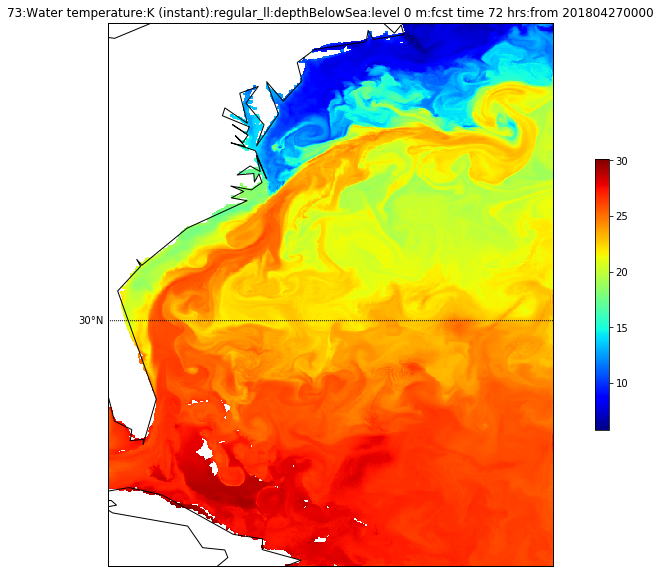

Hit Enter to quit. anything else repeats: 


In [42]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
import os
%matplotlib inline
    
plt.figure(figsize=(15,10))
filename=''
while not os.path.isfile(filename):
    print "Invalid File: %s" % filename
    grbFiles = os.listdir("GFS/.")
    for grbi in range(len(grbFiles) - 1, -1, -1):
        if "grb" not in grbFiles[grbi] and "GRB" not in grbFiles[grbi]:
            del(grbFiles[grbi])
    for grbi in range(len(grbFiles)):
        print "File " + str(grbi), grbFiles[grbi]
    filename = raw_input("Choose " + str(range(len(grbFiles))) + " or Enter Valid Filename: ")
    if len(filename)<3:
        filename = grbFiles[int(filename)]
print "filename:",filename

Done='go'

grbs = pygrib.open(filename)

for i in range(grbs.messages):
    print grbs.message(i+1)

plt.figure(figsize=(15,10))
LayerToPlot,SecondLayer=(-1,-1)

while len(Done)>0:

    while LayerToPlot>grbs.messages or LayerToPlot<1:
        if LayerToPlot <> -1:
            print "Invalid Layer: %s" % LayerToPlot 
        LayerToPlot=raw_input("Choose Message #: ").split('.')
        if len(LayerToPlot)>1:
            LayerToPlot,SecondLayer=tuple([int(iii) for iii in LayerToPlot])
        else:
            LayerToPlot=int(LayerToPlot[0])

    grb = grbs.select()[LayerToPlot-1]
    data = grb.values

    # need to shift data grid longitudes from (0..360) to (-180..180)
    lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
    float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
    lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
    float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
    #lons=lons-360
    data, lons = shiftgrid(min(lons), data, lons, start=False)
    grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid

    m = Basemap(projection='cyl', llcrnrlon=lons.min(), \
        urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
        resolution='c')
    
    x, y = m(grid_lon, grid_lat)

    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)

    m.drawcoastlines()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    plt.colorbar(cs,orientation='vertical', shrink=0.5)
    plt.title(grb)
    plt.draw()
    plt.show()
    Done=raw_input("Hit Enter to quit. anything else repeats: ")

In [29]:
LayerToPlot=999
SecondLayer=None

while LayerToPlot>10 or LayerToPlot<1:
    print "Invalid Layer: %s" % LayerToPlot
    #for i in range(grbs.messages):
    #    print grbs.message(i+1)
    LayerToPlot=raw_input("Choose Message #: ").split('.')
    if len(LayerToPlot)>1:
        LayerToPlot,SecondLayer=tuple([int(iii) for iii in LayerToPlot])
    else:
        LayerToPlot=int(LayerToPlot[0])
print LayerToPlot,('' if SecondLayer is None else SecondLayer)

Invalid Layer: 999
Choose Message #: 5.5
5 5


In [17]:
LayerToPlot="9.10".split('.')
print LayerToPlot
#tuple([int(iii) for iii in str(LayerToPlot).split('.')])

['9', '10']


In [ ]:
grbs.name
for i in grbs.select():
    print i
print grb

In [6]:
data=grbs.select()[1]
for ii in data.keys():
    try:
        print ii,":",data[ii]
    except:
        print 'ERROR'
        continue

parametersVersion : 1
UseEcmfConventions : 1
GRIBEX_boustrophedonic : 0
hundred : [100 100]
globalDomain : g
GRIBEditionNumber : 1
eps : 0
offsetSection0 : 0
section0Length : 8
totalLength : 5811
editionNumber : 1
WMO : 0
productionStatusOfProcessedData : 0
section1Length : 28
wrongPadding : 0
table2Version : 2
centre : kwbc
centreDescription : US National Weather Service - NCEP
generatingProcessIdentifier : 96
gridDefinition : 255
indicatorOfParameter : 71
parameterName : TCC Total cloud cover %
parameterUnits : unknown
indicatorOfTypeOfLevel : 10
pressureUnits : hPa
typeOfLevelECMF : unknown
typeOfLevel : unknown
level : 0
yearOfCentury : 18
month : 4
day : 29
hour : 6
minute : 0
second : 0
unitOfTimeRange : 1
P1 : 0
P2 : 6
timeRangeIndicator : 3
numberIncludedInAverage : 0
numberMissingFromAveragesOrAccumulations : 0
centuryOfReferenceTimeOfData : 21
subCentre : 0
paramIdECMF : 228164
paramId : 228164
cfNameECMF : unknown
cfName : unknown
cfVarNameECMF : tcc
cfVarName : tcc
unitsECM

In [ ]:
lats, lons = data.latlons()

In [ ]:
TopLeft=(41.4646,-71.3749)
BottomRight=(32.3191,-64.7526)
print lats.shape, lats.min(), lats.max(), lons.shape, lons.min(), lons.max()
print grbs.message(3)

In [ ]:
#data, lats, lons = grb.data(lat1=20,lat2=70,lon1=220,lon2=320)
data, lats, lons = grb.data(lat1=41.5,lat2=32,lon1=BottomRight[1]+360,lon2=TopLeft[1]+360)

In [ ]:
data, lats, lons =  grb.data(lat1=32,lat2=42,lon1=360-71,lon2=360-31)
print "lats:",len(lats),lats
print "lons:",len(lons),lons
print "data:",len(data),data

In [33]:
print grb

2:U-component of current:m s**-1 (instant):regular_ll:depthBelowSea:level 0 m:fcst time 0 hrs:from 201804270000


In [ ]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
 
plt.figure(figsize=(12,8))
 
grib = 'cams_aod.grib' # Set the file name of your input GRIB file
grib = 'wafs37.t00z.ens00.grib2'
grbs = pygrib.open(grib)
 
grb = grbs.select()[0]
data = grb.values
 
# need to shift data grid longitudes from (0..360) to (-180..180)
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data, lons = shiftgrid(180., data, lons, start=False)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')
 
x, y = m(grid_lon, grid_lat)
 
if False:
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.gist_stern_r)

    m.drawcoastlines()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    plt.colorbar(cs,orientation='vertical', shrink=0.5)
    plt.title('CAMS AOD forecast') # Set the name of the variable to plot
    plt.savefig(grib+'.png') # Set the output file name


In [ ]:
!ls

In [ ]:
import urllib
import time
bah=time.localtime()
url_root="http://ftp.ocean.weather.gov/grids/operational/NCOM/regional/GRIB2/"
filename="ncom_useast_%d%02d%02d00.grb2"%(bah.tm_year,bah.tm_mon,bah.tm_mday)
#url="http://ftp.ocean.weather.gov/grids/operational/NCOM/regional/GRIB2/ncom_useast_2018042700.grb2"
url=url_root+filename
print "Retrieving file %s from %s"%(filename, url)
urllib.urlretrieve(url, "./GFS/%s"%filename)

In [ ]:
print "%d%02d%02d00.grb2"%(bah.tm_year,bah.tm_mon,bah.tm_mday)

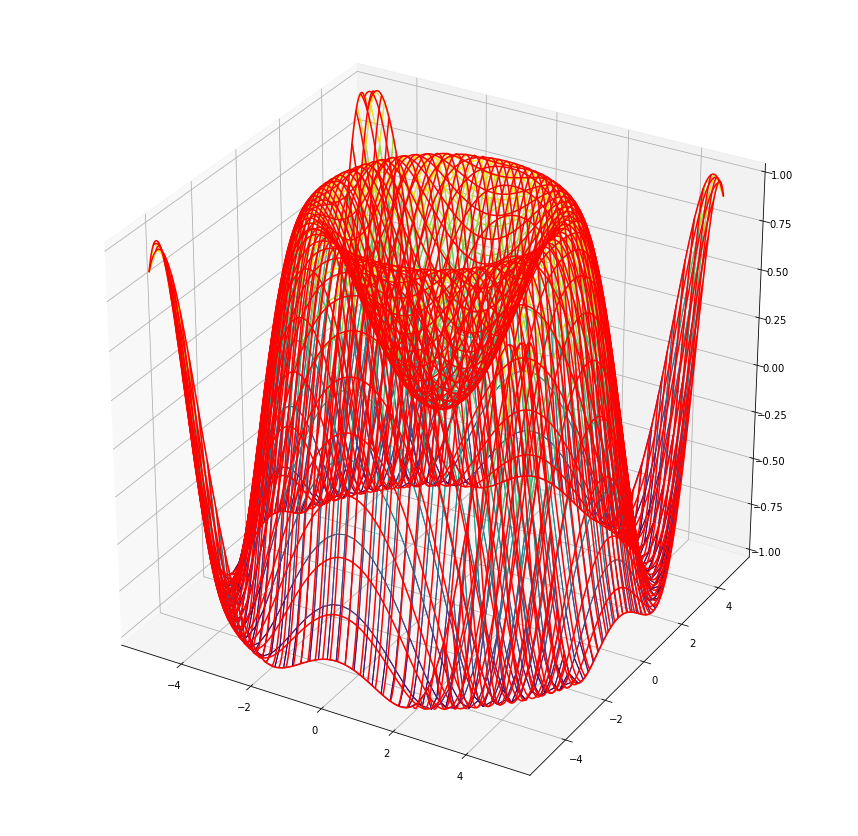

In [22]:
from scipy import interpolate
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(x, y)
z = np.sin((xx**2+yy**2)/6)
# Normalize to [0,1]
Z = (z-z.min())/(z.max()-z.min())

colors = cm.viridis((z-z.min())/(z.max()-z.min()))
rcount, ccount, _ = colors.shape

# Plot a basic wireframe.
surf = ax1.plot_surface(xx,yy,z, rcount=rcount, ccount=ccount,\
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
#ax1.plot_wireframe(xx, yy, z, rstride=3, cstride=3)
#fig = plt.figure(figsize=(15,15))
#ax1 = fig.add_subplot(111, projection='3d')
f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
xx, yy = np.meshgrid(xnew, ynew)
znew = f(xnew, ynew)
surf2 = ax1.plot_wireframe(xx,yy,znew, color='r')
#surf.set_facecolor((0,0,0,0))
#ax1.plot_wireframe(xx, yy, z, rstride=3, cstride=3,'r')
#plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

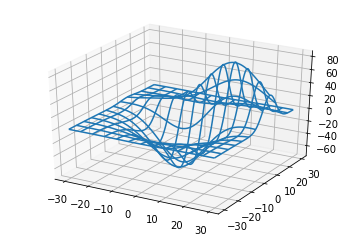

In [206]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()
